In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.ELM import fixed_NN


In [81]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

layers_list = [
    [10, 200],
    [10, 500],
    [10, 1000],
    [10, 200, 200],
    [10, 500, 500]
]

layers_list = [
    [10, 500],
    [10, 500, 500],
    [10, 1000],
    [10, 1000, 1000],
]
torch.set_grad_enabled(False)

alpha_list = [0.01, 0.1, 0.5, 1]

HP_list = itertools.product(layers_list, alpha_list)
results = []
for HyperParam in HP_list:
    layers, a = HyperParam

    NN_kernel = fixed_NN(layers)
    X_expanded = NN_kernel(torch.Tensor(X_dev))
    X_expanded = X_expanded.numpy()

    reg = linear_model.Ridge(alpha=a)

    res = kFoldCross(reg.fit, reg.predict, X_expanded, Y_dev, 5)
    res = res[0], res[1], len(layers)-1,  layers[1], a
    results.append(res)

df = pd.DataFrame(results, columns=['MEE_mean', 'MEE_std', 'n_layers', 'size', 'alpha'])

In [82]:
df.sort_values(by=['MEE_mean'])

,MEE_mean,MEE_std,n_layers,size,alpha
13,3.099007,0.166290,2,1000,0.10
5,3.164418,0.122885,2,500,0.10
9,3.185433,0.140391,1,1000,0.10
8,3.204043,0.116046,1,1000,0.01
1,3.215775,0.162519,1,500,0.10
12,3.224207,0.155597,2,1000,0.01
4,3.232847,0.171950,2,500,0.01
2,3.234020,0.125705,1,500,0.50
6,3.245700,0.146298,2,500,0.50
10,3.275706,0.141273,1,1000,0.50


<AxesSubplot:>

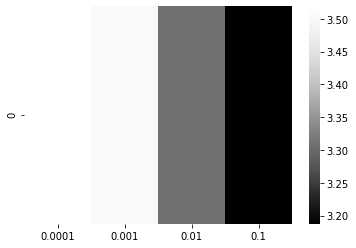

In [76]:
df2 = df.loc[df['n_layers'] == 1]
df2 = df2.loc[df['size'] == 500]
df2.sort_values(by=['MEE_mean'])

df2 = df2.sort_values(by=['alpha'])
mee_means = df2['MEE_mean']
alphas = df2['alpha']


sns.heatmap(mee_means.to_numpy().reshape(1,-1), xticklabels=alphas, cmap='Greys_r')

